In [22]:
data={"NAV":[10,11,12,13,9,7,15],
     "Units":[100,500,100,50,10,500,1000]}

In [23]:
import pandas as pd
table=pd.DataFrame(data)
df=table.copy()
table['Amount']=table['NAV']*table['Units']
sales=500
Current_NAV=13
profit=0
j=0
for i in df['Units']:
    if i==sales:
        profit=profit+(sales*Current_NAV)-(df['NAV'][j]*i)
        df.drop([j], axis=0, inplace=True)
        break
    elif i<sales:
        profit=profit+(i*Current_NAV)-(df['NAV'][j]*i)
        sales=sales-i
        df.drop([j], axis=0, inplace=True)
    elif i>sales:
        profit=profit+(sales*Current_NAV)-(df['NAV'][j]*sales)
        units=i-sales
        df['Units'][j]=units
        break 
    j+=1
    
    
jsonData={}   

df1=df['NAV']*df['Units']
amt = df1.sum()
units = df['Units'].sum()
avg_nav = amt/units
df['Amount']=df['NAV']*df['Units']
amount = df['Amount'].sum()
unrealised_gain=(Current_NAV*units)-amount


for i in df.columns:
    jsonData[i]=[j for j in df[i]]

jsonData['invested_amt']=amount
jsonData['unit_bal']=units
jsonData['realised_gain']=profit
jsonData['avg_nav']=avg_nav
jsonData['unrealised_gain']=unrealised_gain

print(f'Invested Amount {amount}')
print(f'Units Balance {units}')
print(f'Realised Gain {profit}')
print(f'Unrealised Gain {unrealised_gain}')
print('Avg NAV %.2f'% avg_nav)


Invested Amount 21540
Units Balance 1760
Realised Gain 1100
Unrealised Gain 1340
Avg NAV 12.24


In [27]:
import tensorflow as tf

In [28]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)  # y labels are oh-encoded

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [32]:
n_train = mnist.train.num_examples  # 55,000
n_validation = mnist.validation.num_examples  # 5000
n_test = mnist.test.num_examples 
n_input = 784  # input layer (28x28 pixels)
n_hidden1 = 512  # 1st hidden layer
n_hidden2 = 256  # 2nd hidden layer
n_hidden3 = 128  # 3rd hidden layer
n_output = 10  # o
learning_rate = 1e-4
n_iterations = 1000
batch_size = 128
dropout = 0.5

In [39]:
X = tf.placeholder("float", [None, n_input])
Y = tf.placeholder("float", [None, n_output])
keep_prob = tf.placeholder(tf.float32)

In [40]:
weights = {
    'w1': tf.Variable(tf.truncated_normal([n_input, n_hidden1], stddev=0.1)),
    'w2': tf.Variable(tf.truncated_normal([n_hidden1, n_hidden2], stddev=0.1)),
    'w3': tf.Variable(tf.truncated_normal([n_hidden2, n_hidden3], stddev=0.1)),
    'out': tf.Variable(tf.truncated_normal([n_hidden3, n_output], stddev=0.1)),
}


In [41]:
biases = {
    'b1': tf.Variable(tf.constant(0.1, shape=[n_hidden1])),
    'b2': tf.Variable(tf.constant(0.1, shape=[n_hidden2])),
    'b3': tf.Variable(tf.constant(0.1, shape=[n_hidden3])),
    'out': tf.Variable(tf.constant(0.1, shape=[n_output]))
}

In [42]:
layer_1 = tf.add(tf.matmul(X, weights['w1']), biases['b1'])
layer_2 = tf.add(tf.matmul(layer_1, weights['w2']), biases['b2'])
layer_3 = tf.add(tf.matmul(layer_2, weights['w3']), biases['b3'])
layer_drop = tf.nn.dropout(layer_3, keep_prob)
output_layer = tf.matmul(layer_3, weights['out']) + biases['out']

In [44]:
cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(
        labels=Y, logits=output_layer
        ))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

In [45]:
correct_pred = tf.equal(tf.argmax(output_layer, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [46]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [47]:
for i in range(n_iterations):
    batch_x, batch_y = mnist.train.next_batch(batch_size)
    sess.run(train_step, feed_dict={
        X: batch_x, Y: batch_y, keep_prob: dropout
        })

    # print loss and accuracy (per minibatch)
    if i % 100 == 0:
        minibatch_loss, minibatch_accuracy = sess.run(
            [cross_entropy, accuracy],
            feed_dict={X: batch_x, Y: batch_y, keep_prob: 1.0}
            )
        print(
            "Iteration",
            str(i),
            "\t| Loss =",
            str(minibatch_loss),
            "\t| Accuracy =",
            str(minibatch_accuracy)
            )

Iteration 0 	| Loss = 3.5578985 	| Accuracy = 0.0625
Iteration 100 	| Loss = 0.45585334 	| Accuracy = 0.875
Iteration 200 	| Loss = 0.48571393 	| Accuracy = 0.8359375
Iteration 300 	| Loss = 0.38955694 	| Accuracy = 0.8671875
Iteration 400 	| Loss = 0.4481781 	| Accuracy = 0.8828125
Iteration 500 	| Loss = 0.3427707 	| Accuracy = 0.890625
Iteration 600 	| Loss = 0.2634595 	| Accuracy = 0.90625
Iteration 700 	| Loss = 0.3126185 	| Accuracy = 0.859375
Iteration 800 	| Loss = 0.28092915 	| Accuracy = 0.8984375
Iteration 900 	| Loss = 0.36695126 	| Accuracy = 0.890625


In [48]:
test_accuracy = sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels, keep_prob: 1.0})
print("\nAccuracy on test set:", test_accuracy)


Accuracy on test set: 0.9158


In [54]:
import numpy as np
from PIL import Image

In [92]:
img = np.invert(Image.open("download.png").convert('L'))

In [75]:
prediction = sess.run(tf.argmax(output_layer, 1), feed_dict={X: [img]})
print ("Prediction for test image:", np.squeeze(prediction))

ValueError: Cannot feed value of shape (1, 206, 244) for Tensor 'Placeholder_3:0', which has shape '(?, 784)'

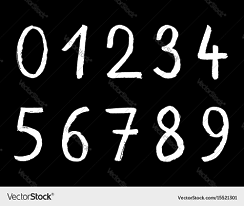

In [93]:
Image.fromarray(img)

In [90]:
img = img